In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


Import Necessary Libraries

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset and check for nulls and types

In [70]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
print(df.info())
print("\n")
print(df.isnull().sum())
print("\n")
print(df['Cabin'].value_counts())
print("\n")
print(df['Embarked'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: in

Handling NULL values

In [71]:
#Age-Integer
print(round(df['Age'].mean(),1))
df['Age']=df['Age'].fillna(round(df['Age'].mean(),1))
print("\n")

#Cabin-Object
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
print(df['Cabin'].value_counts())
print("\n")

#Embarked-Object
df['Embarked']=df['Embarked'].fillna('C')
print(df['Embarked'].value_counts())
print("\n")

print(df.isnull().sum())
print(df.head(10))

29.7


Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64


Embarked
S    644
C    170
Q     77
Name: count, dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Se

Encoding categorical variables

In [72]:
le=LabelEncoder()
cat_var=['Sex','Ticket','Cabin','Embarked']
for col in cat_var:
    df[col]=le.fit_transform(df[col])
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   
5                                   Moran, Mr. James    1  29.7      0      0   
6                            McCarth

Scaling/Normalizing the Data

In [73]:
sc=StandardScaler()
num_var=df.select_dtypes(include=['int64','float64']).columns
for col in num_var:
    df[col]=sc.fit_transform(df[[col]])
print(df.head(10))

   PassengerId  Survived    Pclass  \
0    -1.730108 -0.789272  0.827377   
1    -1.726220  1.266990 -1.566107   
2    -1.722332  1.266990  0.827377   
3    -1.718444  1.266990 -1.566107   
4    -1.714556 -0.789272  0.827377   
5    -1.710669 -0.789272  0.827377   
6    -1.706781 -0.789272 -1.566107   
7    -1.702893 -0.789272  0.827377   
8    -1.699005  1.266990  0.827377   
9    -1.695117  1.266990 -0.369365   

                                                Name       Sex       Age  \
0                            Braund, Mr. Owen Harris  0.737695 -0.592494   
1  Cumings, Mrs. John Bradley (Florence Briggs Th... -1.355574  0.638776   
2                             Heikkinen, Miss. Laina -1.355574 -0.284677   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel) -1.355574  0.407912   
4                           Allen, Mr. William Henry  0.737695  0.407912   
5                                   Moran, Mr. James  0.737695  0.000054   
6                            McCarthy, Mr. Timoth

Outliers visualization using Box-Plots

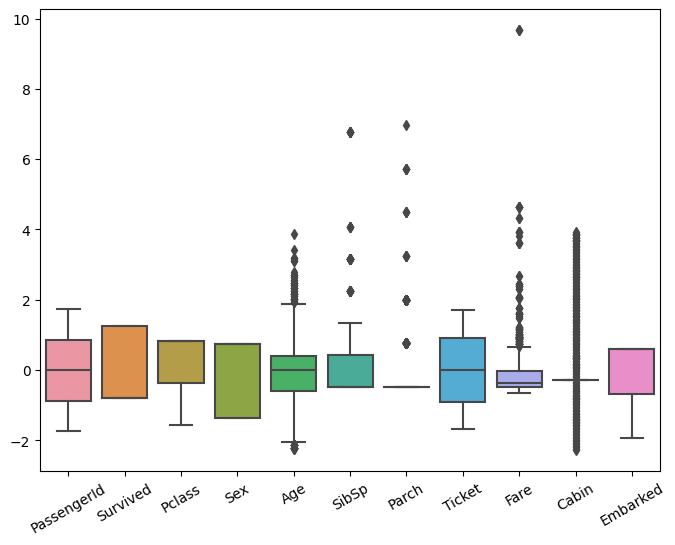

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=30)
plt.show()